In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib widget

We use the [WaterLog time series dataset](https://github.com/mribrahim/TSA/?tab=readme-ov-file) which describes drinking water management control systems in the presence of normal operations and attacks. Any time series resulting from a forced dynamical system is adequate as well. In my work at INL, I used simulated data from a coupled spring-mass damper system for testing and analysis of anomaly detection and root cause analysis.

In this dataset, attacks are anomalous activities and are labeled. For training system behavior, we ignore anomalies in the training set. After processing, there are 97434 training points and 33080 validation points.

In [2]:
data_raw = pd.read_excel('dataset_SAU.xlsx')

In [3]:
num_train = int(len(data_raw) * 0.75)
data_train = data_raw.iloc[:num_train, 1:-1].loc[data_raw['Normal/Attack'] != 1].values
data_test = data_raw.iloc[num_train:, 1:-1].values

labels = data_raw.iloc[:,-1].values
test_labels = labels[num_train:]
num_train = data_train.shape[0]
num_obs = data_train.shape[1]
num_train

97434

In [ ]:
fig, ax = 

# Basic Autoencoder - PCA-based techniques
A rudimentary, yet successful, approach for anomaly detection is using PCA for dimensionality reduction. As a refresher, given mean-centered data with $n$ rows (data) and $p$ columns (features), $X\in \mathbb{R}^{n\times p}$ ($n\ne p$ in general), principal component analysis (PCA) performs diagonalization of the covariance matrix $\frac{1}{n-1} X^{T}X = P\Lambda P^{T}$ where $\Lambda\in \mathbb{R}^{p\times p}$ is the diagonal matrix of the so-called singular values and $P\in\mathbb{R}^{p\times p}$ is the matrix of eigenvectors associated with $\Lambda$. Projection of the matrix $X$ onto the $k$-dimensional subspace is performed by extracting the first $k$ columns of the matrix $P$ and applying $X_{\mathrm{proj}} = XP_k \in \mathbb{R}^{n\times k}$. The final reconstruction is given by $\hat{X} = X_{\mathrm{proj}} P_k^T = XP_kP_k^T$

Essentially, PCA projects data onto a smaller linear subspace that captures some percentage of the total variance. One drawback of PCA in this form is that it represents a *global* process, that is, given data $X\in\mathbb{R}^{n\times p}$ where $n\gg p$, PCA assumes that the measurements at one time (row) are not dependent on measurements at previous times. For most dynamic processes, this is untrue, even for linear processes such as first-order spring-mass damper systems. The lagged dynamics generated by time-dependent variables is known as **auto-correlation**.

One way to rectify this issue while mostly retaining the simplicity of PCA is to instead partition the data via an iterative, windowed approach. Given mean-centered data $\mathbf{X}= [x^T_0,\dots, x^T_n]^T \in \mathbb{R}^{n\times p}$, $n\gg p$, assume that the data is well-represented by a first-order system. Consider the lagged window of length $l$,
$$ X(l) = \begin{bmatrix}
x_t^T &x_{t-1}^T &\dots &x_{t-l}^T \\
x_{t+1}^T & x_t^T & \dots &x_{t-l+1}^T \\
\vdots &\vdots &\vdots &\vdots \\
x_{n}^T &x_{n-1}^T &\dots &x_{n-l}^T
\end{bmatrix} \in \mathbb{R}^{(n-l+1) \times lp}$$

In [ ]:
l = 3

train_noised_centered = (data_train - np.mean(data_train, axis=0))
X_l = np.concat([train_noised_centered[(l-j-1):(num_train-l-j+2)] for j in range(l)], axis=1)
X_l

array([[ 1.17374864e+01,  5.54601063e-01, -4.12929253e+00, ...,
         3.41915414e+00,  1.37585470e-01,  1.06738921e-03],
       [-1.34032351e+01, -4.45398937e-01,  3.48565865e+00, ...,
         2.25107526e+00,  7.85947419e-03,  1.06738921e-03],
       [ 1.05973638e+01,  5.54601063e-01, -4.72196846e+00, ...,
         5.88451362e+00, -1.85571475e-01,  1.06738921e-03],
       ...,
       [-3.13082180e+00, -4.45398937e-01, -3.86934109e+00, ...,
         3.16039274e+00, -1.23201319e+00,  1.06738921e-03],
       [-9.80058924e+00, -4.45398937e-01,  5.55173389e+00, ...,
         2.53592177e+00, -5.75957308e-01,  1.06738921e-03],
       [ 1.45058064e+00,  5.54601063e-01,  5.86476400e+00, ...,
         3.02617195e+00, -6.83885447e-01,  1.06738921e-03]],
      shape=(97431, 48))

np.int64(22)

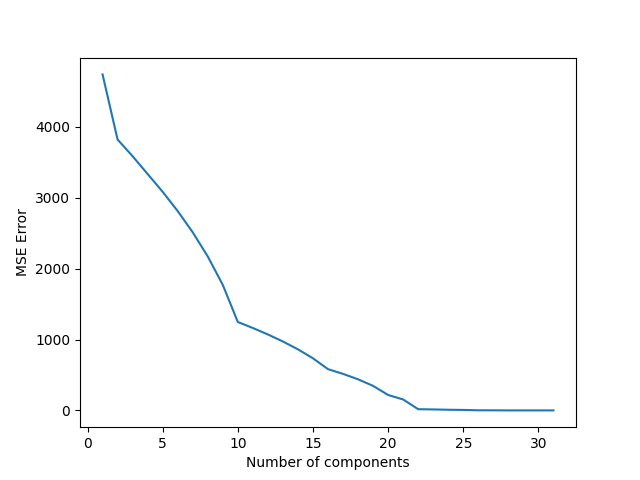

In [ ]:
U, S, Vt = np.linalg.svd(X_l, full_matrices=False)
P = U
S = np.diag(S)
plt.close()

error_norms = np.array([np.linalg.norm(U[:, :k] @ S[:k, :k] @ Vt[:k,:] - X_l) for k in range(1,X_l.shape[1])])
plt.plot(np.arange(1,X_l.shape[1]),error_norms)
plt.xlabel('Number of components')
plt.ylabel('MSE Error')
k_f = np.argwhere(error_norms <100)[0][0]+1
k_f


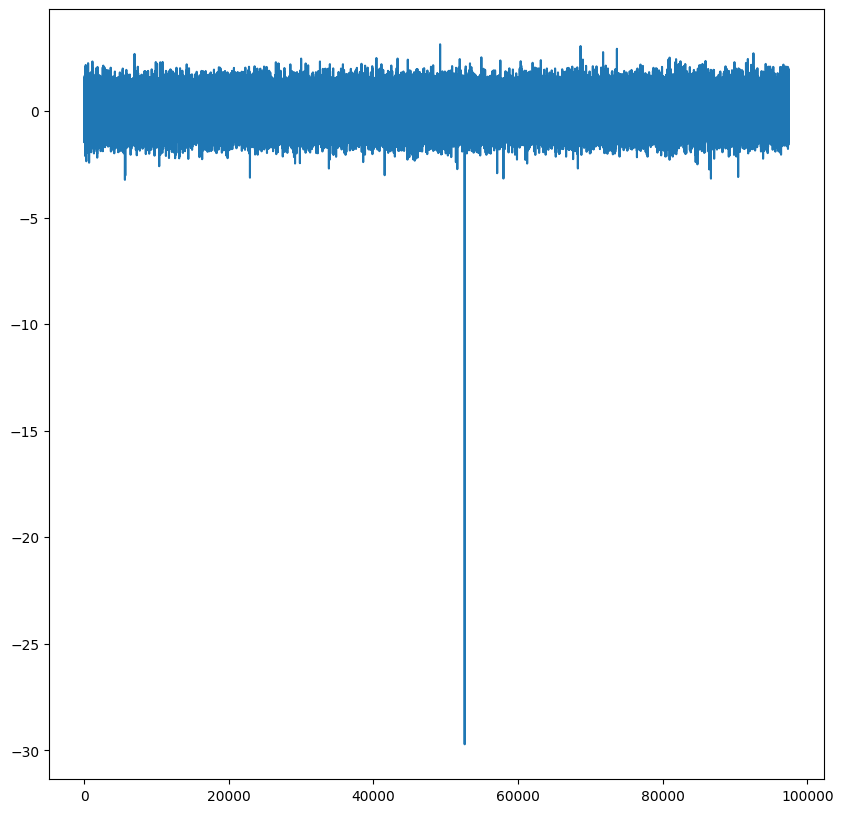

In [189]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

recon_err = X_recon[:, 0:num_obs] - X_l[:,0:num_obs]
ax.plot(X_recon[:,3])